In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import xgboost as xgb


In [6]:
import lightgbm as lgb

In [7]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [8]:
data = load_diabetes()

X=data.data
y=data.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [10]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
# DMatrix format

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [12]:
dtrain

In [13]:
# Parameters for the model

param = {'max_depth':3, 'eta':0.01, 'objective':'reg:squarederror'}

In [14]:
# model training set-up, early stopping

num_round = 1000
evallist = [(dtest, 'eval'), (dtrain,'train')]
eval_result = {}
model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=10, evals_result=eval_result)

[0]	eval-rmse:72.93089	train-rmse:77.56304
[1]	eval-rmse:72.64378	train-rmse:77.18040
[2]	eval-rmse:72.36109	train-rmse:76.80327
[3]	eval-rmse:72.08278	train-rmse:76.43160
[4]	eval-rmse:71.80880	train-rmse:76.06532
[5]	eval-rmse:71.53908	train-rmse:75.70437
[6]	eval-rmse:71.25887	train-rmse:75.33864
[7]	eval-rmse:70.99426	train-rmse:74.97820
[8]	eval-rmse:70.73045	train-rmse:74.62795
[9]	eval-rmse:70.49050	train-rmse:74.28277
[10]	eval-rmse:70.24539	train-rmse:73.94244
[11]	eval-rmse:70.00295	train-rmse:73.60703
[12]	eval-rmse:69.76562	train-rmse:73.27638
[13]	eval-rmse:69.52100	train-rmse:72.94524
[14]	eval-rmse:69.27481	train-rmse:72.62546
[15]	eval-rmse:69.00998	train-rmse:72.30320
[16]	eval-rmse:68.78755	train-rmse:71.98529
[17]	eval-rmse:68.55737	train-rmse:71.66870
[18]	eval-rmse:68.30442	train-rmse:71.35914
[19]	eval-rmse:68.10443	train-rmse:71.05081
[20]	eval-rmse:67.88706	train-rmse:70.74940
[21]	eval-rmse:67.65367	train-rmse:70.45212
[22]	eval-rmse:67.42270	train-rmse:70.1555

/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[144]	eval-rmse:54.55936	train-rmse:51.41510
[145]	eval-rmse:54.50638	train-rmse:51.33934
[146]	eval-rmse:54.49653	train-rmse:51.27183
[147]	eval-rmse:54.44134	train-rmse:51.20355
[148]	eval-rmse:54.39128	train-rmse:51.13031
[149]	eval-rmse:54.38487	train-rmse:51.05716
[150]	eval-rmse:54.34173	train-rmse:50.97433
[151]	eval-rmse:54.30855	train-rmse:50.90155
[152]	eval-rmse:54.26702	train-rmse:50.82060
[153]	eval-rmse:54.21821	train-rmse:50.75081
[154]	eval-rmse:54.21148	train-rmse:50.68788
[155]	eval-rmse:54.17196	train-rmse:50.60942
[156]	eval-rmse:54.13908	train-rmse:50.53580
[157]	eval-rmse:54.13380	train-rmse:50.46351
[158]	eval-rmse:54.09624	train-rmse:50.38741
[159]	eval-rmse:54.06778	train-rmse:50.31600
[160]	eval-rmse:54.03163	train-rmse:50.24175
[161]	eval-rmse:53.98058	train-rmse:50.17450
[162]	eval-rmse:53.95632	train-rmse:50.11302
[163]	eval-rmse:53.92198	train-rmse:50.04091
[164]	eval-rmse:53.89417	train-rmse:49.97593
[165]	eval-rmse:53.85479	train-rmse:49.90794
[166]	eval

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'iterations')

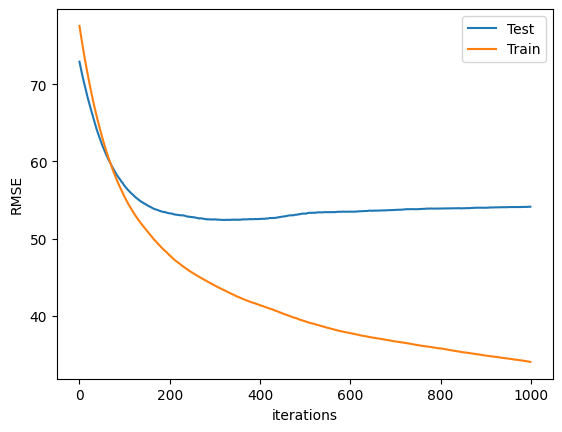

In [16]:
epochs = len(eval_result['eval']['rmse'])
x_axis = range(0,epochs)
plt.figure()
plt.plot(x_axis, eval_result['eval']['rmse'], label='Test')
plt.plot(x_axis, eval_result['train']['rmse'], label='Train')
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('iterations')

In [17]:
import pandas as pd

In [18]:
eval_result.keys()

dict_keys(['eval', 'train'])

In [20]:
results_df = pd.DataFrame([eval_result['eval']['rmse'], eval_result['train']['rmse']]).T

In [21]:
results_df['diff'] = results_df[0] - results_df[1]

In [22]:
results_df[results_df['diff'] <0.01]

,0,1,diff
0,72.930889,77.563037,-4.632147
1,72.643776,77.180398,-4.536622
2,72.361093,76.803274,-4.442181
3,72.082784,76.431603,-4.348818
4,71.808797,76.065323,-4.256526
...,...,...,...
64,60.292083,60.532969,-0.240886
65,60.173519,60.360002,-0.186483
66,60.064582,60.194993,-0.130410
67,59.941553,60.024619,-0.083066


In [24]:
model.best_iteration = 68

In [25]:
predict = model.predict(dtest)

In [26]:
predict

array([159.18893 , 206.27591 , 175.22429 , 295.9157  , 125.61823 ,
       128.06154 , 257.15338 , 211.338   , 149.00725 , 154.41249 ,
       104.102036, 196.0869  ,  91.59793 , 239.47511 , 118.52005 ,
       111.4021  , 229.35774 , 256.7412  , 185.72925 , 235.24536 ,
       186.84236 ,  96.88423 ,  70.414986, 199.52876 , 152.07    ,
       187.21767 , 204.85905 , 196.00319 ,  72.606544, 108.55862 ,
       180.78674 , 118.76349 , 146.50636 , 183.84616 , 149.25348 ,
       187.11473 , 112.96919 , 114.76101 , 184.28674 ,  68.52865 ,
        67.98585 ,  83.91956 , 174.2202  , 185.96986 , 180.46988 ,
        79.47412 , 100.26168 , 112.16302 ,  73.11136 , 164.4933  ,
       124.60371 ,  82.27981 , 140.3247  , 100.12516 , 195.36021 ,
       146.1376  ,  96.57848 , 232.90302 ,  89.81601 ,  89.82054 ,
       174.07098 , 185.5151  , 127.16104 ,  85.30461 , 122.92981 ,
       234.15456 , 162.96346 , 181.43661 , 151.00249 , 112.90678 ,
       161.7822  , 192.78462 , 239.39641 ,  97.16356 ,  87.351

In [27]:
y_test

array([219.,  70., 202., 230., 111.,  84., 242., 272.,  94.,  96.,  94.,
       252.,  99., 297., 135.,  67., 295., 264., 170., 275., 310.,  64.,
       128., 232., 129., 118., 263.,  77.,  48., 107., 140., 113.,  90.,
       164., 180., 233.,  42.,  84., 172.,  63.,  48., 108., 156., 168.,
        90.,  52., 200.,  87.,  90., 258., 136., 158.,  69.,  72., 171.,
        95.,  72., 151., 168.,  60., 122.,  52., 187., 102., 214., 248.,
       181., 110., 140., 202., 101., 222., 281.,  61.,  89.,  91., 186.,
       220., 237., 233.,  68., 190.,  96.,  72., 153.,  98.,  37.,  63.,
       184.])

In [30]:
# for lightgbm - dataset object used for lightGBM

train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)



In [31]:
params = {'objective':'regression', 'metric':'rmse'}

model_lgb = lgb.train(params, train_data)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 595
[LightGBM] [Info] Number of data points in the train set: 353, number of used features: 10
[LightGBM] [Info] Start training from score 153.736544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [32]:
model_lgb.best_iteration

0

In [33]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 258 kB 2.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [43]:
X_train

array([[ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736405, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, ...,  0.07120998,
         0.00027248,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027, ..., -0.00259226,
         0.01703607, -0.01350402],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090325, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845972, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514219, -0.0010777 ]])

In [44]:
y_train

array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
       178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
       166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
       104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
       208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
       317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
       107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
       175.,  42., 127.,  53.,  94., 104., 199., 265., 281., 248., 257.,
       215., 303., 170.,  59., 277., 209., 138., 198., 124.,  96., 288.,
       225., 265., 101.,  55., 198.,  51., 252.,  64., 220., 131., 212.,
       142., 103., 155., 121.,  86., 111.,  65., 131.,  51., 128., 141.,
        48., 109., 178.,  88.,  84., 216., 150.,  60.,  96., 190.,  74.,
       279., 182., 160., 245., 276., 174., 180., 150., 196., 138.,  97.,
       246., 321., 308., 109.,  69., 182., 258., 16

In [46]:
X_resampled, y_resampled = SMOTE.fit_resample(X_train, y_train)

TypeError: fit_resample() missing 1 required positional argument: 'y'

AttributeError: type object 'SMOTE' has no attribute 'resample'